In [221]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import cross_val_score
import xgboost as xgb

In [195]:
listings = 'listings.csv'
cols = ['price','host_response_time','host_response_rate','host_is_superhost','host_listings_count',
        'host_has_profile_pic','host_identity_verified','neighbourhood_cleansed','is_location_exact',
        'property_type','room_type','accommodates','bathrooms','bedrooms','beds','bed_type','amenities',
       'square_feet','guests_included','minimum_nights','availability_30',
       'availability_60','availability_90','availability_365','number_of_reviews','review_scores_rating',
       'instant_bookable','cancellation_policy','require_guest_profile_picture','require_guest_phone_verification',
       'reviews_per_month']
df = pd.read_csv(listings, usecols = cols)

In [196]:
df.availability_30 = df.availability_30/30
df.availability_60 = df.availability_60/60
df.availability_90 = df.availability_90/90
df.availability_365 = df.availability_365/365
df.price = df.price.replace('[\$,)]','', regex=True).replace('[(]','-', regex=True).astype(float)
df.host_response_rate = df.price.replace('[\%,)]','', regex=True).astype(float)
df = df.loc[(df['price'] > 0) & (df['price'] <= 600)]
df.shape

(20527, 31)

In [197]:
df.dtypes

host_response_time                   object
host_response_rate                  float64
host_is_superhost                    object
host_listings_count                 float64
host_has_profile_pic                 object
host_identity_verified               object
neighbourhood_cleansed               object
is_location_exact                    object
property_type                        object
room_type                            object
accommodates                          int64
bathrooms                           float64
bedrooms                            float64
beds                                float64
bed_type                             object
amenities                            object
square_feet                         float64
price                               float64
guests_included                       int64
minimum_nights                        int64
availability_30                     float64
availability_60                     float64
availability_90                 

In [198]:
df.iloc[0:5,:]

,host_response_time,host_response_rate,host_is_superhost,host_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,is_location_exact,property_type,room_type,...,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,reviews_per_month
0,within an hour,59.0,t,1.0,t,f,Oostelijk Havengebied - Indische Buurt,f,Apartment,Private room,...,0.300000,0.477778,0.243836,267,98.0,t,strict_14_with_grace_period,f,f,2.12
1,within an hour,80.0,f,2.0,t,f,Centrum-Oost,t,Townhouse,Private room,...,0.133333,0.377778,0.339726,283,88.0,f,strict_14_with_grace_period,f,f,2.46
2,within an hour,125.0,f,2.0,t,f,Centrum-West,f,Apartment,Entire home/apt,...,0.100000,0.177778,0.205479,3,100.0,f,strict_14_with_grace_period,f,f,0.16
3,within an hour,150.0,t,1.0,t,t,Centrum-West,t,Houseboat,Private room,...,0.216667,0.288889,0.180822,195,99.0,t,strict_14_with_grace_period,f,f,2.11
4,within an hour,75.0,t,3.0,t,t,Centrum-West,t,Apartment,Private room,...,0.083333,0.133333,0.378082,283,97.0,f,moderate,f,f,2.59


In [199]:
# categorical varibles
cate_cols = ['host_response_time','host_is_superhost','host_has_profile_pic','host_identity_verified','neighbourhood_cleansed','is_location_exact',
        'property_type','room_type','bed_type','instant_bookable','cancellation_policy','require_guest_profile_picture','require_guest_phone_verification']
# numerical varibles
num_cols = ['host_response_rate','host_listings_count','accommodates','bathrooms','bedrooms','beds','square_feet','guests_included','minimum_nights','availability_30',
       'availability_60','availability_90','availability_365','number_of_reviews','review_scores_rating','reviews_per_month']

In [200]:
cat_df = df.loc[:,cate_cols + ['price']]
#cat_df = cat_df.melt(id_vars=['price'])
#cat_df.iloc[0:5,:]
#cat_df.shape[1]

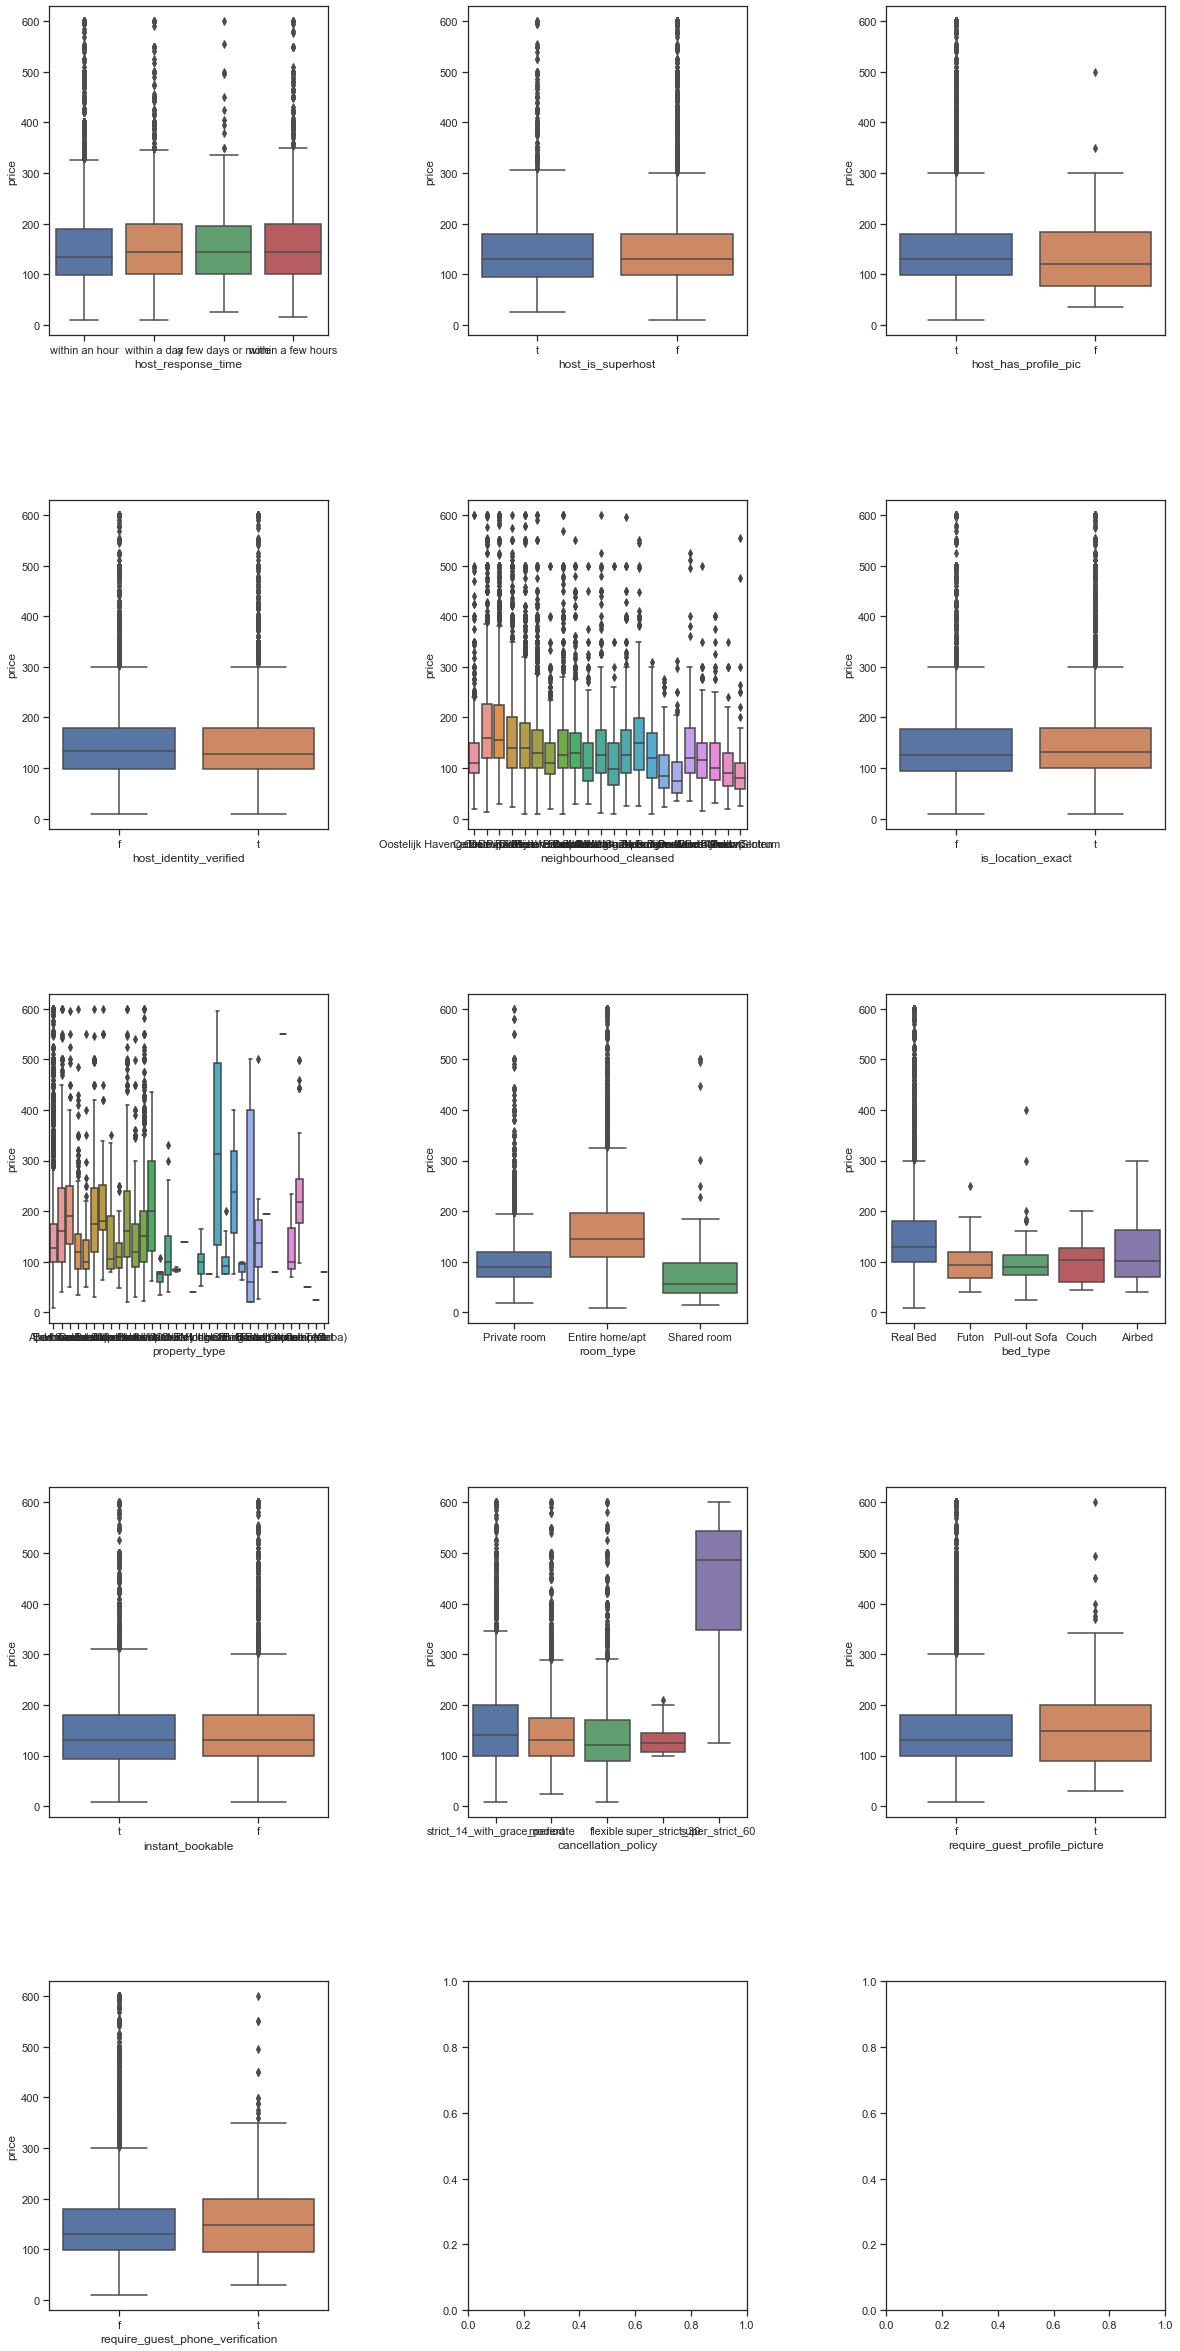

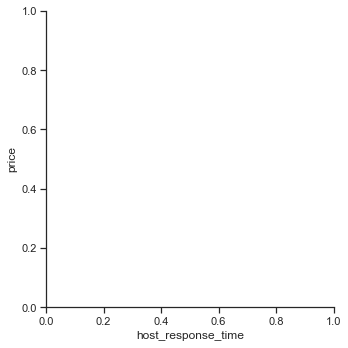

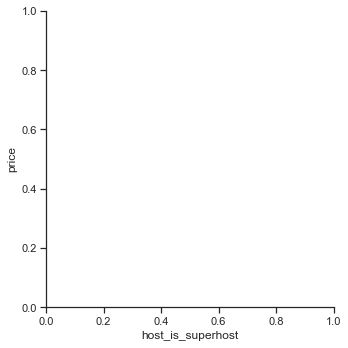

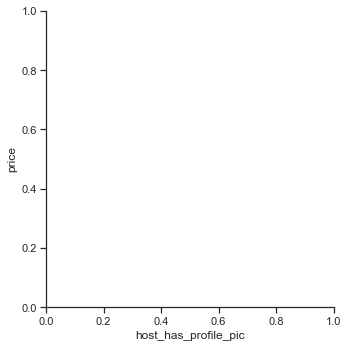

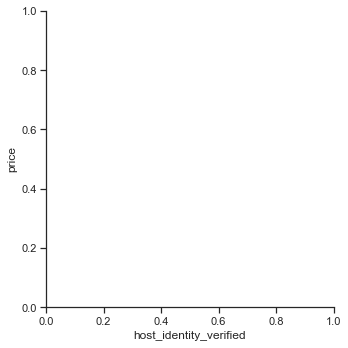

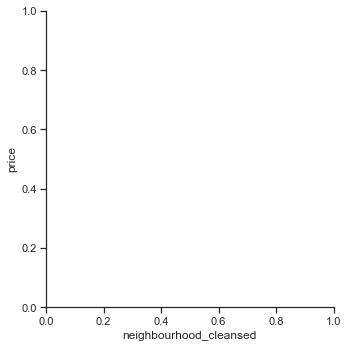

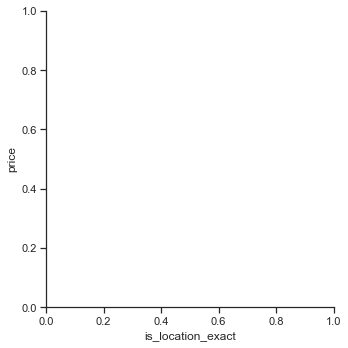

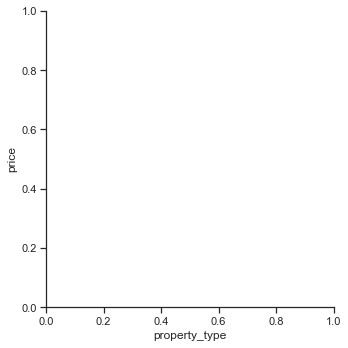

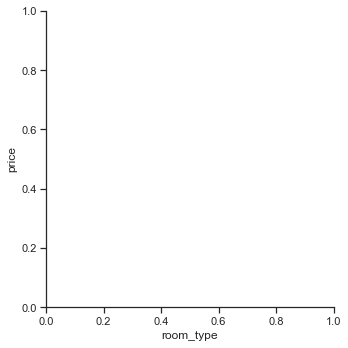

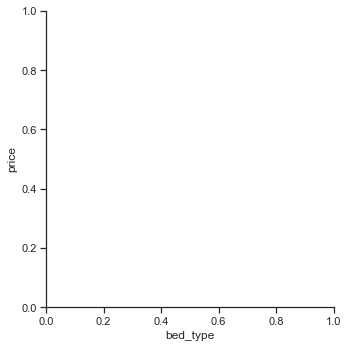

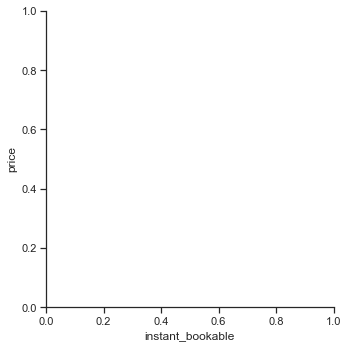

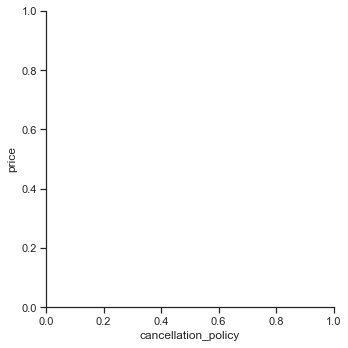

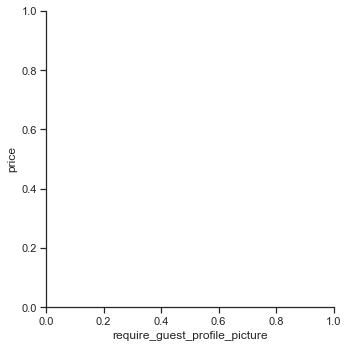

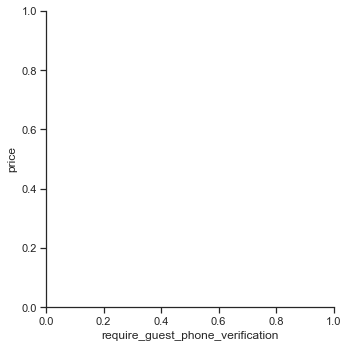

In [109]:
col_number = 3
var_number = len(cate_cols)
row_number = int(var_number/col_number + 1 )

fig, ax = plt.subplots(figsize=(20,40), ncols=col_number, nrows=row_number)


left   =  0.125  # the left side of the subplots of the figure
right  =  0.9    # the right side of the subplots of the figure
bottom =  0.1    # the bottom of the subplots of the figure
top    =  0.9    # the top of the subplots of the figure
wspace =  0.5     # the amount of width reserved for blank space between subplots
hspace =  0.5  

plt.subplots_adjust(
    left    =  left, 
    bottom  =  bottom, 
    right   =  right, 
    top     =  top, 
    wspace  =  wspace, 
    hspace  =  hspace
)


y_title_margin = 1.0

for i in range(0,len(cate_cols)) :
    col_name = cate_cols[i]
    ax0 = i//col_number
    ax1 = i%col_number
    #ax[ax0][ax1].set_title(col_name,  y = y_title_margin)
    sub_df = cat_df.loc[:, ['price',col_name]]
    
    sns.catplot(x=col_name, y="price", kind="box", data=sub_df, ax=ax[ax0][ax1])

In [201]:
num_df = df.loc[:,num_cols + ['price']]
#num_df = num_df.melt(id_vars=['price'])
num_df.iloc[0:5,:]
#num_df.shape[1]

,host_response_rate,host_listings_count,accommodates,bathrooms,bedrooms,beds,square_feet,guests_included,minimum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,reviews_per_month,price
0,59.0,1.0,2,1.5,1.0,2.0,NaN,1,3,0.266667,0.300000,0.477778,0.243836,267,98.0,2.12,59.0
1,80.0,2.0,2,1.0,1.0,1.0,NaN,2,1,0.000000,0.133333,0.377778,0.339726,283,88.0,2.46,80.0
2,125.0,2.0,3,1.0,1.0,1.0,NaN,2,14,0.133333,0.100000,0.177778,0.205479,3,100.0,0.16,125.0
3,150.0,1.0,2,1.0,1.0,1.0,NaN,1,2,0.200000,0.216667,0.288889,0.180822,195,99.0,2.11,150.0
4,75.0,3.0,2,1.0,1.0,1.0,NaN,1,2,0.066667,0.083333,0.133333,0.378082,283,97.0,2.59,75.0


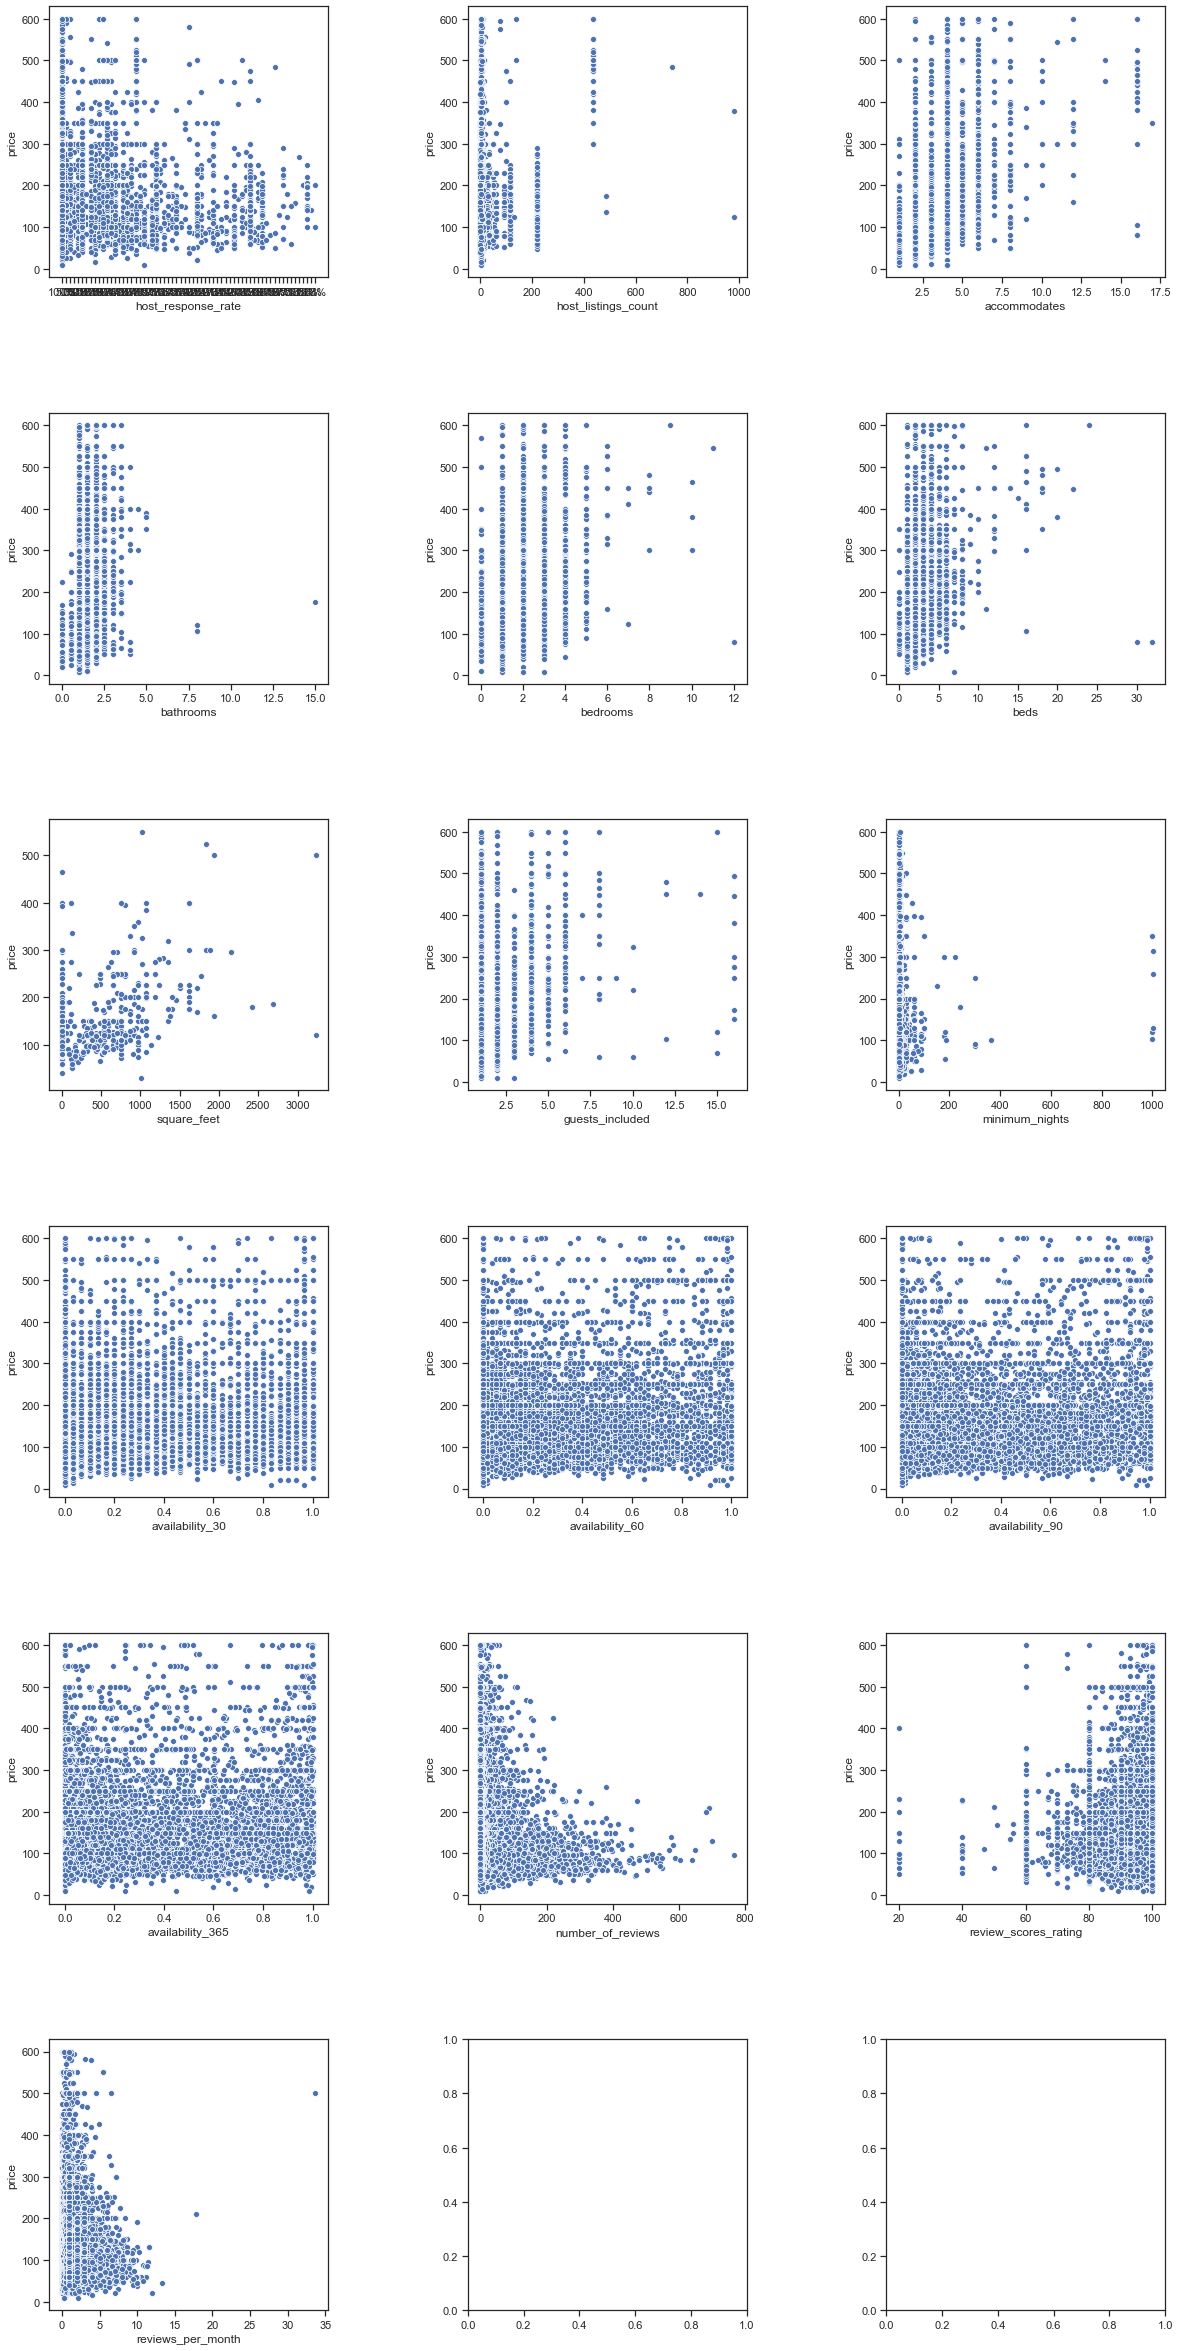

In [135]:
col_number = 3
var_number = len(num_cols)
row_number = int(var_number/col_number + 1 )

fig, ax = plt.subplots(figsize=(20,40), ncols=col_number, nrows=row_number)


left   =  0.125  # the left side of the subplots of the figure
right  =  0.9    # the right side of the subplots of the figure
bottom =  0.1    # the bottom of the subplots of the figure
top    =  0.9    # the top of the subplots of the figure
wspace =  0.5     # the amount of width reserved for blank space between subplots
hspace =  0.5  

plt.subplots_adjust(
    left    =  left, 
    bottom  =  bottom, 
    right   =  right, 
    top     =  top, 
    wspace  =  wspace, 
    hspace  =  hspace
)


y_title_margin = 1.0

#cmap = sns.cubehelix_palette(dark=.3, light=.8, as_cmap=True)

for i in range(0,len(num_cols)) :
    col_name = num_cols[i]
    ax0 = i//col_number
    ax1 = i%col_number
    #ax[ax0][ax1].set_title(col_name,  y = y_title_margin)
    sub_df = num_df.loc[:, ['price',col_name]]
    
    sns.scatterplot(x=col_name, y="price", data=sub_df, ax=ax[ax0][ax1],palette= "GnBu_d" )

In [203]:
#df = df.apply(lambda x: x.str.strip()).replace('', np.nan)

cat_df = df.loc[:,cate_cols ]
cat_df = cat_df.fillna('Missing')
encoded_x = None
features = []
for i in range(0, cat_df.shape[1]):
    label_encoder = LabelEncoder()
    feature = label_encoder.fit_transform(cat_df.iloc[:,i])
    feature = feature.reshape(cat_df.shape[0], 1)
    onehot_encoder = OneHotEncoder(sparse=False, categories='auto')
    feature = onehot_encoder.fit_transform(feature)
    if encoded_x is None:
        encoded_x = feature
    else:
        encoded_x = np.concatenate((encoded_x, feature), axis=1)
        

In [210]:
num_df = df.loc[:,num_cols ].fillna('0').to_numpy()
num_df.shape

(20527, 16)

In [205]:
encoded_x.shape

(20527, 92)

In [211]:
X = np.concatenate((encoded_x, num_df), axis=1)
y = df.loc[:,'price'].to_numpy()

In [215]:
y[0:5]

array([ 59.,  80., 125., 150.,  75.])

In [213]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [214]:
rf = RandomForestRegressor(n_estimators=15, max_depth=5, random_state=0)
clf = BaggingRegressor(rf, n_estimators=45, max_samples=0.1, random_state=25)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE: %f" % (rmse))
#xgb_reg = xgb.XGBRegressor(rf, colsample_bytree = 0.3, learning_rate = 0.1,
                 #alpha = 10, n_estimators = 10)
#xgb_reg.fit(X_train,y_train)
#preds = xgb_reg.predict(X_test)
#rmse = np.sqrt(mean_squared_error(y_test, preds))
#print("RMSE: %f" % (rmse))

RMSE: 1.788498


In [216]:
y_test[0:5]

array([400.,  60., 150.,  80., 110.])

In [217]:
y_pred[0:5]

array([399.7158468 ,  57.81137672, 149.62991422,  78.54827256,
       109.65071451])

In [222]:
scores = cross_val_score(clf, X_train, y_train, cv=5)
scores.mean()

0.9993677922175388

In [226]:
feature_importances = np.mean([ tree.feature_importances_ for tree in clf.estimators_ ], axis=0)

In [227]:
feature_importances

array([4.08371906e-06, 6.25896982e-09, 1.29884388e-06, 3.99950739e-06,
       2.95223513e-06, 1.24672888e-07, 4.69106305e-06, 4.03863951e-06,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       2.69192356e-06, 1.85545236e-06, 4.52060921e-07, 0.00000000e+00,
       0.00000000e+00, 2.92087205e-07, 4.03980826e-06, 1.21979668e-05,
       0.00000000e+00, 5.12826771e-06, 5.79896239e-07, 0.00000000e+00,
       0.00000000e+00, 1.27764213e-07, 0.00000000e+00, 0.00000000e+00,
       1.31618669e-07, 0.00000000e+00, 1.99315979e-06, 6.39838794e-07,
       1.16433746e-06, 2.17580928e-07, 7.15494597e-06, 4.61784076e-07,
       3.90882205e-06, 1.83669030e-06, 0.00000000e+00, 1.02286618e-05,
       0.00000000e+00, 0.00000000e+00, 1.69690504e-06, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 8.86583348e-07, 0.00000000e+00, 2.88728053e-08,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
      